# [프로젝트] 공연 및 축제 데이터 분석하기

---

## 프로젝트 개요

주말이면 어디선가 들려오는 음악 소리, 무심코 지나친 그 공연은 어떤 행사였을까요?     

>"문화 축제는 주로 어느 시기에 많이 열릴까?     
>"공연이나 행사에서 가장 많이 등장하는 키워드는 뭘까?"     
>"지역별 공연 행사 규모를 지도로 한눈에 살펴볼 순 없을까?"

이번 프로젝트에서는 전국의 공연 행사 및 문화 축제 데이터를 기반으로, 시기/지역별 개최 현황, 규모 등을 탐색합니다.    

---

## 프로젝트 목표

- 공연 행사 및 문화 축제 데이터를 바탕으로 월별 행사 개최 현황, 지역별 공연 분포 및 규모, 행사 키워드 등을 분석
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 시각화 방법 및 통계 기초 학습

---

## 데이터 출처

공공데이터포털 - 전국공연행사정보표준데이터    
https://www.data.go.kr/data/15013106/standard.do#

공공데이터포털 - 전국문화축제표준데이터     
https://www.data.go.kr/data/15013104/standard.do

---

## 목차

1. 데이터 읽기   
2. 데이터 정제하기   
3. 데이터 분석하기     
    - 월별 행사 개최 현황 분석
    - 지역별 행사 분포 및 규모 시각화
    - 입장 연령 분포 분석
    - 행사 내용 키워드 분석
    - 관람 요금 분석
4. 퀴즈 제출하기

---

## 1. 데이터 읽기

### 1.1. 데이터 불러오기

이번 프로젝트에 필요한 라이브러리를 불러옵니다.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import folium
import numpy as np
import re
import random
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

분석에 사용할 데이터는 크게 '공연 행사'와 '문화 축제' 데이터로 구분되어 있습니다.    
먼저 '공연 행사'와 관련한 데이터를 확인해 볼까요?

In [4]:
# 공연 행사 데이터 불러오기
event_df = pd.read_csv('data/전국공연행사정보표준데이터.csv', encoding='cp949')

# 상위 5개 행 확인
event_df.head()

,행사명,장소,행사내용,행사시작일자,행사종료일자,행사시작시각,행사종료시각,요금정보,주관기관명,주최기관명,전화번호,후원기관명,객석수,관람요금,입장연령,할인정보,유의사항,홈페이지주소,예매정보,주차장보유여부,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,나의 노래 공연,금산다락원 생명의집,김광석을 동경하는 무명 가수 이야기,2018-11-02,2018-11-02,14:00,21:00,유료,한국문화예술회관연합회+충청남도 금산군청+금산다락원,한국문화예술회관연합회+충청남도 금산군청+금산다락원,041-750-4424,복권위원회+문화체육관광부,1404.0,5000,7세이상,NaN,NaN,http://www.geumsan.go.kr/daragwon/,https://daragwon.moonhwain.net:451/rsvp/login....,Y,충청남도 금산군 금산읍 금산로 1559,충청남도 금산군 금산읍 중도리 203-1,36.112068,127.491637,2025-02-03,4550000,충청남도 금산군
1,정글북,금산다락원 생명의집,애니메이션 정글북을 원작으로 한 모험 극,2018-11-07,2018-11-07,11:00,21:00,유료,충청남도 금산군청+금산다락원,충청남도 금산군청+금산다락원,041-750-4423,NaN,352.0,1000,48개월이상,NaN,NaN,http://www.geumsan.go.kr/daragwon/,https://daragwon.moonhwain.net:451/rsvp/login....,Y,충청남도 금산군 금산읍 금산로 1559,충청남도 금산군 금산읍 중도리 203-1,36.112068,127.491637,2025-02-03,4550000,충청남도 금산군
2,정글북,금산다락원 생명의집,애니메이션 정글북을 원작으로 한 모험 극,2018-11-08,2018-11-08,11:00,21:00,유료,충청남도 금산군청+금산다락원,충청남도 금산군청+금산다락원,041-750-4423,NaN,526.0,1000,48개월이상,NaN,NaN,http://www.geumsan.go.kr/daragwon/,https://daragwon.moonhwain.net:451/rsvp/login....,Y,충청남도 금산군 금산읍 금산로 1559,충청남도 금산군 금산읍 중도리 203-1,36.112068,127.491637,2025-02-03,4550000,충청남도 금산군
3,뮤지컬디스이즈잇 힙합공연,금산다락원 생명의집,청소년들에게 꿈과 희망을 주는 멘토들의 신나는 힙합공연+DJ쇼,2018-11-16,2018-11-16,14:00,21:00,무료,한국문화예술회관연합회+충청남도 금산군청+금산다락원,한국문화예술회관연합회+충청남도 금산군청+금산다락원,041-750-4424,복권위원회+문화체육관광부,727.0,NaN,전체관람가,NaN,NaN,http://www.geumsan.go.kr/daragwon/,https://daragwon.moonhwain.net:451/rsvp/login....,Y,충청남도 금산군 금산읍 금산로 1559,충청남도 금산군 금산읍 중도리 203-1,36.112068,127.491637,2025-02-03,4550000,충청남도 금산군
4,수능 탈출 콘서트,금산다락원 생명의집,수험시험에 지친 청소년들을 위한 공연,2018-11-19,2018-11-19,15:00,21:00,무료,충청남도 금산군청+금산다락원,충청남도 금산군청+금산다락원,041-750-4423,NaN,400.0,NaN,전체관람가,NaN,NaN,http://www.geumsan.go.kr/daragwon/,https://daragwon.moonhwain.net:451/rsvp/login....,Y,충청남도 금산군 금산읍 금산로 1559,충청남도 금산군 금산읍 중도리 203-1,36.112068,127.491637,2025-02-03,4550000,충청남도 금산군


`event_df`의 각 컬럼 정보를 확인해 봅시다.

In [5]:
# 공연 행사 데이터 컬럼 정보 확인
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행사명       7617 non-null   object 
 1   장소        7617 non-null   object 
 2   행사내용      7617 non-null   object 
 3   행사시작일자    7617 non-null   object 
 4   행사종료일자    7617 non-null   object 
 5   행사시작시각    7617 non-null   object 
 6   행사종료시각    7614 non-null   object 
 7   요금정보      7617 non-null   object 
 8   주관기관명     7617 non-null   object 
 9   주최기관명     7617 non-null   object 
 10  전화번호      6480 non-null   object 
 11  후원기관명     1341 non-null   object 
 12  객석수       5069 non-null   float64
 13  관람요금      3355 non-null   object 
 14  입장연령      5261 non-null   object 
 15  할인정보      1598 non-null   object 
 16  유의사항      1336 non-null   object 
 17  홈페이지주소    5991 non-null   object 
 18  예매정보      2709 non-null   object 
 19  주차장보유여부   7617 non-null   object 
 20  소재지도로명주소  7501 non-null   obje

각 행사의 이름과 내용, 일정, 장소, 객석 수, 입장 연령 등의 정보가 포함되어 있네요.     
이제 분석에 사용할 주요 컬럼들을 세부적으로 살펴볼까요?

`행사명` 열에는 각 행사의 제목이 담겨있습니다.

In [6]:
# 행사명 상위 5개 행 확인
event_df['행사명'].head()

0         나의 노래 공연
1              정글북
2              정글북
3    뮤지컬디스이즈잇 힙합공연
4        수능 탈출 콘서트
Name: 행사명, dtype: object

`장소`, `소재지도로명주소`, `위도`, `경도` 등은 각 행사 장소 정보를 저장하고 있습니다.

In [7]:
# 위치 관련 컬럼 상위 5개 행 확인
event_df[['장소', '소재지도로명주소', '위도', '경도', '제공기관명']].head()

,장소,소재지도로명주소,위도,경도,제공기관명
0,금산다락원 생명의집,충청남도 금산군 금산읍 금산로 1559,36.112068,127.491637,충청남도 금산군
1,금산다락원 생명의집,충청남도 금산군 금산읍 금산로 1559,36.112068,127.491637,충청남도 금산군
2,금산다락원 생명의집,충청남도 금산군 금산읍 금산로 1559,36.112068,127.491637,충청남도 금산군
3,금산다락원 생명의집,충청남도 금산군 금산읍 금산로 1559,36.112068,127.491637,충청남도 금산군
4,금산다락원 생명의집,충청남도 금산군 금산읍 금산로 1559,36.112068,127.491637,충청남도 금산군


`행사명` 열에는 각 행사를 소개하는 간단한 문구가 텍스트로 저장되어 있습니다.

In [8]:
# 행사명 상위 5개 행 확인
event_df['행사내용'].head()

0                   김광석을 동경하는 무명 가수 이야기
1                애니메이션 정글북을 원작으로 한 모험 극
2                애니메이션 정글북을 원작으로 한 모험 극
3    청소년들에게 꿈과 희망을 주는 멘토들의 신나는 힙합공연+DJ쇼
4                  수험시험에 지친 청소년들을 위한 공연
Name: 행사내용, dtype: object

`행사시작일자`, `행사시작시각` 등은 각 행사의 일정 관련 정보를 담고 있습니다.

In [9]:
# 일정 관련 컬럼 상위 5개 행 확인
event_df[['행사시작일자', '행사종료일자', '행사시작시각', '행사종료시각']].head()

,행사시작일자,행사종료일자,행사시작시각,행사종료시각
0,2018-11-02,2018-11-02,14:00,21:00
1,2018-11-07,2018-11-07,11:00,21:00
2,2018-11-08,2018-11-08,11:00,21:00
3,2018-11-16,2018-11-16,14:00,21:00
4,2018-11-19,2018-11-19,15:00,21:00


관람 요금 정보가 포함된 `요금정보`, `관람요금` 열도 있습니다.

In [10]:
# 관람 요금 관련 컬럼 상위 5개 행 확인
event_df[['요금정보', '관람요금']].head()

,요금정보,관람요금
0,유료,5000
1,유료,1000
2,유료,1000
3,무료,NaN
4,무료,NaN


`객석수` 열에는 행사장에 마련된 객석 수가 숫자 형태로 담겨 있습니다.

In [11]:
# 객석 수 상위 5개 행 확인
event_df['객석수'].head()

0    1404.0
1     352.0
2     526.0
3     727.0
4     400.0
Name: 객석수, dtype: float64

`입장연령` 열도 살펴볼까요?

In [14]:
# 입장 연령 상위 5개 행 확인
event_df['입장연령'].value_counts()

입장연령
초등학생 이상             339
8세 이상               318
전체관람가               299
제한없음                286
초등학생이상              266
                   ... 
전체 연령                 1
12세 이상관람가             1
중등학생 이상               1
12개월이상                1
2021년생 포함 이전 출생자      1
Name: count, Length: 277, dtype: int64

`입장연령` 열에 담긴 텍스트는 '초등학생 이상'과 '초등학생이상'이 구분되어 있는 등 아직 정제되지 않은 상태로 저장되어 있습니다.     
앞으로 데이터를 분석하기 전에는 같은 유형의 연령이 그룹화될 수 있도록 정제하는 과정을 거치면 좋곘네요.     
예) '12세관람가', '만 12세 이상' → '초등학생'

지금까지 '공연 행사' 데이터를 살펴보았습니다.    
이번에는 '문화 축제' 데이터를 확인해 볼까요?

In [15]:
# 문화 축제 데이터 불러오기
festival_df = pd.read_csv('data/전국문화축제표준데이터.csv', encoding='cp949')

# 컬럼 정보 출력
festival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   축제명       1279 non-null   object 
 1   개최장소      1279 non-null   object 
 2   축제시작일자    1279 non-null   object 
 3   축제종료일자    1279 non-null   object 
 4   축제내용      1279 non-null   object 
 5   주관기관명     1279 non-null   object 
 6   주최기관명     1279 non-null   object 
 7   후원기관명     551 non-null    object 
 8   전화번호      1182 non-null   object 
 9   홈페이지주소    817 non-null    object 
 10  관련정보      156 non-null    object 
 11  소재지도로명주소  1047 non-null   object 
 12  소재지지번주소   999 non-null    object 
 13  위도        1000 non-null   float64
 14  경도        1000 non-null   float64
 15  데이터기준일자   1279 non-null   object 
 16  제공기관코드    1279 non-null   object 
 17  제공기관명     1279 non-null   object 
dtypes: float64(2), object(16)
memory usage: 180.0+ KB


'공연 행사' 데이터와 유사하게, '문화 축제' 데이터에도 축제명과 내용, 일정, 위치 정보 등이 담겨있네요.     
분석에 사용할 주요 컬럼들을 살펴봅시다.

`축제명`, `축제내용` 열을 확인해 볼까요?

In [16]:
# 축제명 상위 5개 행 확인
festival_df[['축제명', '축제내용']].head()

,축제명,축제내용
0,반포서래 한불음악축제,체험부스+먹거리+지역주민 및 초청가수 공연
1,2024 행복광진 힐링축제,"초대가수 축하 공연, 지역가수 축하 공연"
2,광진가족 클래식 음악산책 지브리 콘서트,스튜디오 지브리 미야자키 하야오의 애니메이션 OST연주
3,2024 청춘대로,청년페스티벌 축하 공연 등 다양한 청년참여 프로그램 운영
4,2024 피크닉인나루,전세대 공감 친환경 콘서트


`개최장소`, `소재지도로명주소`, `제공기관명`에는 지역 및 주소 관련 정보가 있습니다.

In [17]:
# 지역 관련 컬럼 상위 5개 행 확인
festival_df[['개최장소', '소재지도로명주소', '제공기관명']].head()

,개최장소,소재지도로명주소,제공기관명
0,조달청 주차장,서울특별시 서초구 반포대로 217,서울특별시 서초구
1,중곡역 소공원 일대,서울특별시 광진구 능동로 400,서울특별시 광진구
2,건국대 새천년관 대공연장,서울특별시 광진구 능동로 120,서울특별시 광진구
3,"능동로 분수광장, 숲속의 무대 등 능동로 일대",서울특별시 광진구 능동로 216,서울특별시 광진구
4,어린이대공원 숲속의무대,서울특별시 광진구 능동로 216,서울특별시 광진구


마지막으로 `축제시작일자`, `축제종료일자`를 통해 축제 일정을 확인할 수 있습니다. 

In [18]:
# 일정 관련 컬럼 상위 5개 행 확인
festival_df[['축제시작일자', '축제종료일자']].head()

,축제시작일자,축제종료일자
0,2024-06-15,2024-06-15
1,2024-09-07,2024-09-07
2,2024-09-10,2024-09-10
3,2024-09-26,2024-09-28
4,2024-10-05,2024-10-05


이렇게 공연 행사 및 문화 축제 데이터를 모두 살펴보았습니다.     
그럼 잘 이해했는지 간단히 점검해 봅시다! 행사 데이터에서 아래의 행을 어떻게 해석할 수 있을까요?

In [19]:
# 특정 행 출력
event_df.loc[1000, ['행사명', '행사내용', '장소', '행사시작일자', '행사종료일자', '입장연령', '관람요금']]

행사명        제7회 피아노 위크
행사내용      전문 피아노 페스티벌
장소         달서아트센터 와룡홀
행사시작일자     2024-05-22
행사종료일자     2024-05-25
입장연령          8세이상관람가
관람요금            10000
Name: 1000, dtype: object

>'제7회 피아노 위크'는 달서아트센터 와룡홀에서 24년 5월 22일부터 25일까지 진행되며, 8세 이상부터 관람 가능하고 관람 요금은 10,000원이다.

다음 섹션에서는 위에서 살펴본 내용에 기반하여 데이터를 분석에 용이하도록 직접 정제해 보도록 하겠습니다.

---

## 2. 데이터 정제하기

### 2.1. 일정 관련 정보를 `datatime` 타입으로 변환하기

`event_df`와 `festival_df`의 일정 관련 컬럼은 '2018-11-02', '14:00' 형태의 문자열로 저장되어 있습니다.    
날짜와 시간을 다루기 편리한 형태로 만들기 위해 `datetime` 타입으로 변환해 봅시다.

>📌 `pandas.to_datetime()`은 문자열 형태의 날짜 데이터를 `datetime` 형식으로 변환하여, 날짜 계산이나 시계열 분석이 가능하도록 만듭니다.
 

먼저 `event_df` 부터 작업해 볼까요?      
변환할 컬럼은 다음과 같습니다.

In [20]:
# 일정 관련 컬럼 상위 5개 행 확인
event_df[['행사시작일자', '행사종료일자', '행사시작시각', '행사종료시각']].head()

,행사시작일자,행사종료일자,행사시작시각,행사종료시각
0,2018-11-02,2018-11-02,14:00,21:00
1,2018-11-07,2018-11-07,11:00,21:00
2,2018-11-08,2018-11-08,11:00,21:00
3,2018-11-16,2018-11-16,14:00,21:00
4,2018-11-19,2018-11-19,15:00,21:00


`행사시작일자`와 `행사시작시각`을 하나로 합쳐서 `행사시작일시`라는 새로운 컬럼을 만드는 것이 좋겠네요.      
예) '2018-11-02'(`string`) + '14:00'(`string`) → '2018-11-02 14:00:00'(`datetime`)

In [21]:
# 결측값 및 이상치 처리
event_df = event_df.dropna(subset=['행사시작일자', '행사종료일자', '행사시작시각', '행사종료시각'])
event_df['행사시작시각'] = event_df['행사시작시각'].str.replace(r'[^\d:]', '', regex=True)

# 행사시작일자와 시작시각, 행사종료일자와 종료시각을 각각 합쳐서 새로운 컬럼 생성
event_df['행사시작일시'] = pd.to_datetime(event_df['행사시작일자'] + ' ' + event_df['행사시작시각'])
event_df['행사종료일시'] = pd.to_datetime(event_df['행사종료일자'] + ' ' + event_df['행사종료시각'])

event_df[['행사시작일시', '행사종료일시']]

,행사시작일시,행사종료일시
0,2018-11-02 14:00:00,2018-11-02 21:00:00
1,2018-11-07 11:00:00,2018-11-07 21:00:00
2,2018-11-08 11:00:00,2018-11-08 21:00:00
3,2018-11-16 14:00:00,2018-11-16 21:00:00
4,2018-11-19 15:00:00,2018-11-19 21:00:00
...,...,...
7612,2024-08-10 15:00:00,2024-08-10 16:00:00
7613,2024-08-17 15:00:00,2024-08-17 16:00:00
7614,2024-08-24 15:00:00,2024-08-24 16:00:00
7615,2024-09-21 15:00:00,2024-09-21 16:00:00


이제 `행사시작일시`, `행사종료일시`라는 새로운 컬럼에 `datetime` 정보가 저장되었습니다.     
나머지 `festival_df`도 마찬가지로 일정 정보를 `datetime` 타입으로 변환하겠습니다.

In [22]:
# 축제 시작일자와 종료일자 컬럼을 datetime 형식으로 변환
festival_df['축제시작일자'] = pd.to_datetime(festival_df['축제시작일자'])
festival_df['축제종료일자'] = pd.to_datetime(festival_df['축제종료일자'])

festival_df[['축제시작일자', '축제종료일자']]

,축제시작일자,축제종료일자
0,2024-06-15,2024-06-15
1,2024-09-07,2024-09-07
2,2024-09-10,2024-09-10
3,2024-09-26,2024-09-28
4,2024-10-05,2024-10-05
...,...,...
1274,2025-03-29,2025-04-01
1275,2024-10-03,2024-10-06
1276,2025-03-28,2025-03-30
1277,2024-11-09,2024-11-10


---

### 2.2. 입장 연령 분류하기

`event_df`의 입장 연령 정보는 '초등생이상관람가', '초등 이상', '초등학생 이상 관람', '초등 1~2학년' 등과 같이 분류가 정형화되지 않은 상태입니다.     
`입장연령` 컬럼의 고유값들을 살펴볼까요?


In [23]:
# 입장연령 컬럼의 고유값 확인
event_df['입장연령'].unique()

array(['7세이상', '48개월이상', '전체관람가', '초등생이상관람가', '전연령관람가', '36개월이상관람가',
       '8세이상', '14세이상', '13세이상', '5세이상', '24개월이상관람가', nan,
       '2021년생 포함 이전 출생자', '14세 이상', '만 48개월 이상', '초등 이상', '48개월이상관람가',
       '전체관람', '중학생 이상', '중학생이상관람', '36개월 이상', '전연령', '7세이상관람가',
       '18세이상관람가', '13세이상관람가', '8세이상관람가', '만7세이상 관람가능', '전체관람 가능',
       '만8세이상 관람가능', '만13세이상관람가', '만6세이상 관람가능', '만2세이상 관람가능', '5세 이상',
       '만7세이상', '5세 이상 관람 가능', '8세 이상 관람 가능', '중학생 이상 관람 가능', '만13세 이상',
       '초등학생이상', '초등학생 이상', '제한 없음', '전체', '2022년생 포함 이전 출생자',
       '만36개월 이상 관람가', '2023년생 포함 이전 출생자', '누구나', '24개월 이상', '만 8세 이상',
       '8세 이상', '만5세이상 관람가능', '10세 이상 관람가능', '8세 이상 관람가능', '7세 이상 관람 가능',
       '15세 이상', '7세 이상', '전 연령', '6세 이상', '12세 이상', '18세 이상', '초중학생',
       '중고교생', '6세이상', '전체연령', '15세이상관람가', '만 7세 이상', '제한없음', '성인',
       '초등 1~4학년', '아동, 성인', '초등저학년', '60세 이상', '지역아동센터아동', '만 13세 이상',
       '36개월 이상 관람가', '만 36개월 이상 관람가', '만 5세 이상', '만 15세 이상', '만15세이상',
       '초등학생', '초등 1~2학년', '6~7세

행사마다 입장 연령 정보가 통일되어 있지 않은데요.      
데이터 분석을 위해서는 적절한 분류 조건을 만들어 한정된 '라벨'을 만드는 것이 좋겠습니다.

**라벨**:
- `영유아`
- `아동`
- `청소년`
- `성인`
- `전체`
- `기타`

예) '초등생이상관람가', '초등 이상', '초등학생 이상 관람', '초등 1~2학년' → '아동'

텍스트마다 특정 글자를 포함하는지의 여부로 분류 기준을 세워보겠습니다.    
각 라벨로 분류할 조건들을 다음과 같이 지정해 볼까요?

**분류 조건 (텍스트 포함 여부)**:
- `영유아`: 개월, 1-6세, 유아
- `아동`: 7-12세, 초등, 초중, 취학, 아동
- `청소년`: 13-18세, 중학, 중등, 중고, 고등, 청소년
- `성인`: 19-60세, 성인 등 
- `전체`: 전체, 모든 등

이제 분류 함수를 만들어 `입장연령` 컬럼에 적용해 보겠습니다. 

In [24]:
# 입장 연령 분류 함수
def classify_age_group(entry):
    if pd.isna(entry):
        return '기타'
    
    text = str(entry).strip()
    text = re.sub(r'\s+', '', text)   

    # 영유아
    if re.search(r'개월|[1-6]세|유아', text):
        return '영유아'
    
    # 아동
    if re.search(r'7세|8세|9세|1[0-2]세|초등|초중|취학|아동', text):
        return '아동'

    # 청소년
    if re.search(r'1[3-8]세|중학|중등|중고|고등|청소년', text):
        return '청소년'

    # 성인
    if re.search(r'19세|20세|60세|성인', text):
        return '성인'

    # 전체
    if re.search(r'전|누구나|제한없음|무관|모든', text):
        return '전체'

    return '기타'

# 입장연령 컬럼에 적용
event_df['연령분류'] = event_df['입장연령'].apply(classify_age_group)
event_df[['입장연령', '연령분류']]

,입장연령,연령분류
0,7세이상,아동
1,48개월이상,영유아
2,48개월이상,영유아
3,전체관람가,전체
4,전체관람가,전체
...,...,...
7612,전체,전체
7613,전체,전체
7614,전체,전체
7615,전체,전체


새롭게 생성한 `연령분류` 컬럼을 보면 '48개월이상' 등은 '영유아'로, '7세이상' 등은 '아동'으로 분류가 된 것을 확인할 수 있습니다.

---

### 2.3. 관람 요금 정제하기

`event_df`의 관람 요금 정보도 입장 연령과 마찬가지로 각 행사마다 형식이 통일되어 있지 않습니다.     
`관람요금` 컬럼의 고유값들을 확인해 볼까요? 

In [26]:
# 관람 요금 컬럼의 고유값 확인
event_df['관람요금'].unique()

array(['5000', '1000', nan, '10000', '15000', 'R석170000원/S석130000원',
       '전석 5000원', '전석 10000원', 'VIP석 150000원 /R석130000원/A석90000원',
       'R석30000원/S석20000원', '전석 10000', '15000원',
       'VIP석 160000원+R석 140000원+S석 110000원+A석 80000원',
       '1층 20000원+2층 15000원', 'R석80000원/S석70000원/A석 50000원', '전석 30000원',
       'R석80000원/S석50000원', 'R석60000원/S석20000원/A석 30000원', '3000',
       '20000', 'R석1만원', 'R석2만원', 'R석3만5천원', '전석2만원', '전석1만원', '전석5천원',
       'R석 12000원 / S석 8000원 / A석 5000원', 'R석12000원+S석10000원',
       'R석12000원+S석8000원+A석5000원', 'R석10000원+S석7000원+A석5000원',
       '전석 5000원+패키지(7회)30000원', 'R석12000원+S석8000원',
       'R석12000원+S석10000원+A석8000원', '6000', '5000원', '10000원', '20000원',
       '전석 15000원', 'VIP석 100000원+R석 80000원+S석 60000원+A석 30000원',
       'R석 50000원+S석 40000원', '화이트석 143000원+민트석 132000원', '무료',
       '(R석)50000원+(S석)30000원+(A석)10000원', '전석 20000원',
       '전석 15000원+시야불편석 10000원', '1층 20000원+2층 10000원',
       '1층 70000원+2층 60000원', 'R 80000+ S 60000+ A 

'10000' 또는 '전석 10000원'과 같이 단위나 설명이 붙거나 붙지 않은 것들도 있고, 'VIP석 10000원+S석 5000원'과 같이 여러 가격이 한꺼번에 표시된 것도 있네요. 
이 데이터를 숫자 형식으로 정제해 봅시다.

**규칙**:
- 숫자만 있는 경우 → 숫자 그대로
- X만X천(원) → XX000

이제 변환 함수를 만들어 `관람요금` 열에 적용해 볼까요? 

In [30]:
# 관람 요금 정제 함수
def parse_price(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip()
    
    # 숫자만 있는 경우
    if re.fullmatch(r'\d+', value):
        return int(value)
    
    def replace_complex(match):
        man = int(match.group(1))
        chun = int(match.group(2))
        return str(man * 10000 + chun * 1000)

    # 'X만X천(원)' → 'XX000'
    price = re.sub(r'(\d+)\s*만\s*(\d+)\s*천', replace_complex, value)

    # 'X만(원)' → 'X0000'
    price = re.sub(r'(\d+)\s*만\s*원?', lambda m: str(int(m.group(1)) * 10000) + ' ', price)
    
    # 'X천(원)' → 'X000'
    price = re.sub(r'(\d+)\s*천\s*원?', lambda m: str(int(m.group(1)) * 1000) + ' ', price)

    if price != value:
        prices = re.findall(r'\d{3,6}', price)
        if prices:
            prices = list(map(int, prices))
            return int(sum(prices) / len(prices))
        
    # 'X0000원', '전석 X0000원' → 'X0000'
    prices = re.findall(r'\d{3,6}', value)
    if prices:
        prices = list(map(int, prices))
        return int(sum(prices) / len(prices))
    
    return np.nan

# 관람 요금 컬럼에 적용
event_df['관람요금'] = event_df['관람요금'].apply(parse_price)
event_df['관람요금'].value_counts()

관람요금
10000.0    591
20000.0    348
5000.0     246
15000.0    188
30000.0    155
          ... 
24500.0      1
75000.0      1
39000.0      1
16666.0      1
38666.0      1
Name: count, Length: 135, dtype: int64

관람 요금 정보가 숫자 형태로 변환되었습니다.     
자, 이제부터 본격적으로 공연 및 축제 데이터를 분석해 볼까요?

---

## 3. 데이터 분석하기

### 3.1. 월별 행사 개최 현황 분석

>🎇 "일년 중 축제가 가장 많이 열리는 시기는 언제일까?"

공연 및 축제 데이터를 바탕으로 월별 행사 개최 현황을 분석해 봅시다.

먼저 `event_df`에서 `행사시작일시` 컬럼에 기반하여 각 행사가 시작되는 월 정보를 추출하려 합니다.    
앞서 2. 데이터 정제하기에서 `datatime` 형식으로 변환했기 때문에 손쉽게 월(month) 정보만 얻을 수 있습니다.

In [31]:
# 월 정보를 추출하여 새로운 컬럼 생성 
event_df['개최월'] = event_df['행사시작일시'].dt.month
event_df[['행사시작일시', '개최월']]

,행사시작일시,개최월
0,2018-11-02 14:00:00,11
1,2018-11-07 11:00:00,11
2,2018-11-08 11:00:00,11
3,2018-11-16 14:00:00,11
4,2018-11-19 15:00:00,11
...,...,...
7612,2024-08-10 15:00:00,8
7613,2024-08-17 15:00:00,8
7614,2024-08-24 15:00:00,8
7615,2024-09-21 15:00:00,9


이처럼 `행사시작일시` 열에서 월 정보만 추출된 것을 확인할 수 있습니다.     
이번엔 각 월별로 그룹화하여 행사 개최 수를 계산해 볼까요?

>📌 `groupby()`는 특정 컬럼을 기준으로 데이터를 그룹화한 뒤, 각 그룹에 집계, 변환, 필터 등의 연산을 적용할 수 있게 해줍니다.

In [32]:
# 개최월 기준으로 그룹화하여 행사 수 계산
event_monthly_counts = event_df.groupby('개최월').size()
event_monthly_counts

개최월
1     264
2     326
3     560
4     636
5     736
6     666
7     634
8     619
9     750
10    881
11    837
12    705
dtype: int64

1월에 행사 수가 가장 적고, 10월에 가장 많은 것을 확인할 수 있네요!

다음으로 축제 데이터인 `festival_df`에 대해서도 월 정보만 추출하여 그룹화해 봅시다.

In [34]:
# 개최월 기준으로 그룹화하여 축제 수 계산
festival_df['개최월'] = festival_df['축제시작일자'].dt.month
festival_monthly_counts = festival_df.groupby('개최월').size()
festival_monthly_counts

개최월
1      42
2      24
3      73
4     119
5     194
6      66
7      68
8      86
9     188
10    312
11     60
12     47
dtype: int64

공연 행사와 마찬가지로 축제도 10월에 가장 많이 이루어지네요. 

이제 행사와 축제의 개최 건수를 하나의 그래프로 표현하여 비교해 볼까요?    
앞서 출력했던 `event_monthly_counts`와 `festival_monthly_counts`를 사용합니다.

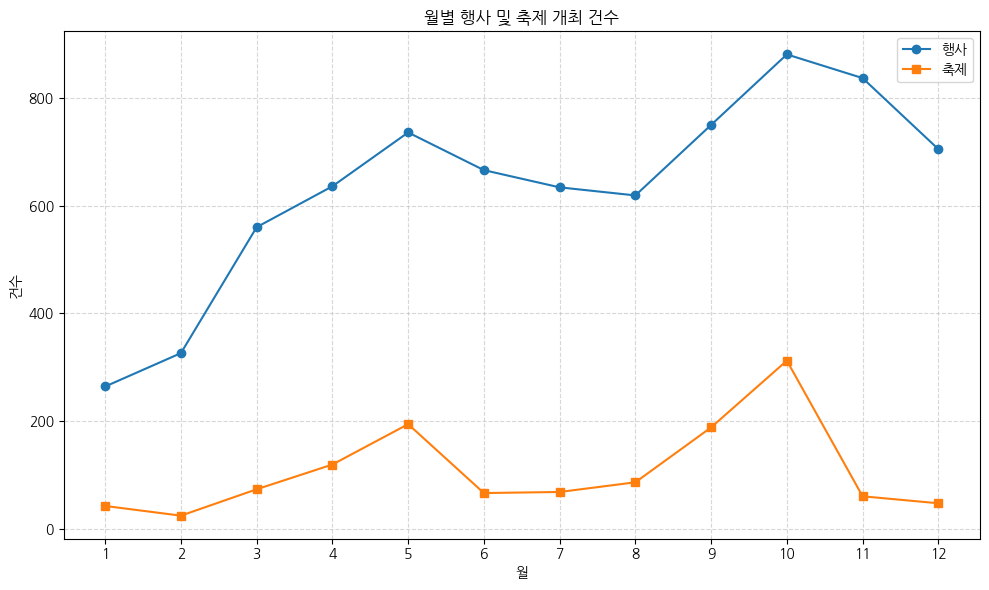

In [35]:
# 선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(event_monthly_counts.index, event_monthly_counts.values, marker='o', label='행사')
plt.plot(festival_monthly_counts.index, festival_monthly_counts.values, marker='s', label='축제')

plt.title('월별 행사 및 축제 개최 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

위와 같이 월별 행사 및 축제 개최 건수를 시각화하니 패턴이 더 분명하게 눈에 들어오네요.    
행사의 경우 2월에서 3월 사이에 개최 건수가 크게 증가합니다.    
한편 축제의 경우 10월에서 11월 사이에 개최 건수가 크게 감소하는 것을 볼 수 있습니다.

이번에는 축제와 행사 일정을 간트차트 형식으로 표현해 볼까요?     
일정을 수평선으로 나타내보면 행사가 특정 시기에 얼마나 많이 개최되는 지 쉽게 확인할 수 있습니다.     
그럼 2024년을 기준으로 간단한 '축제와 행사 일정표'를 만들어 볼까요?

먼저 `festival_df`중 2024년의 축제만 필터링하여 100개 샘플만 뽑아 봅시다.

In [27]:
# 2024년에 시작하는 축제만 필터링
festival_2024 = festival_df[
    (festival_df['축제시작일자'].dt.year == 2024)
]

sample = festival_2024.sample(n=100, random_state=42).sort_values('축제시작일자').reset_index(drop=True)

이제 이 데이터를 바탕으로 간트차트를 그려 봅시다.

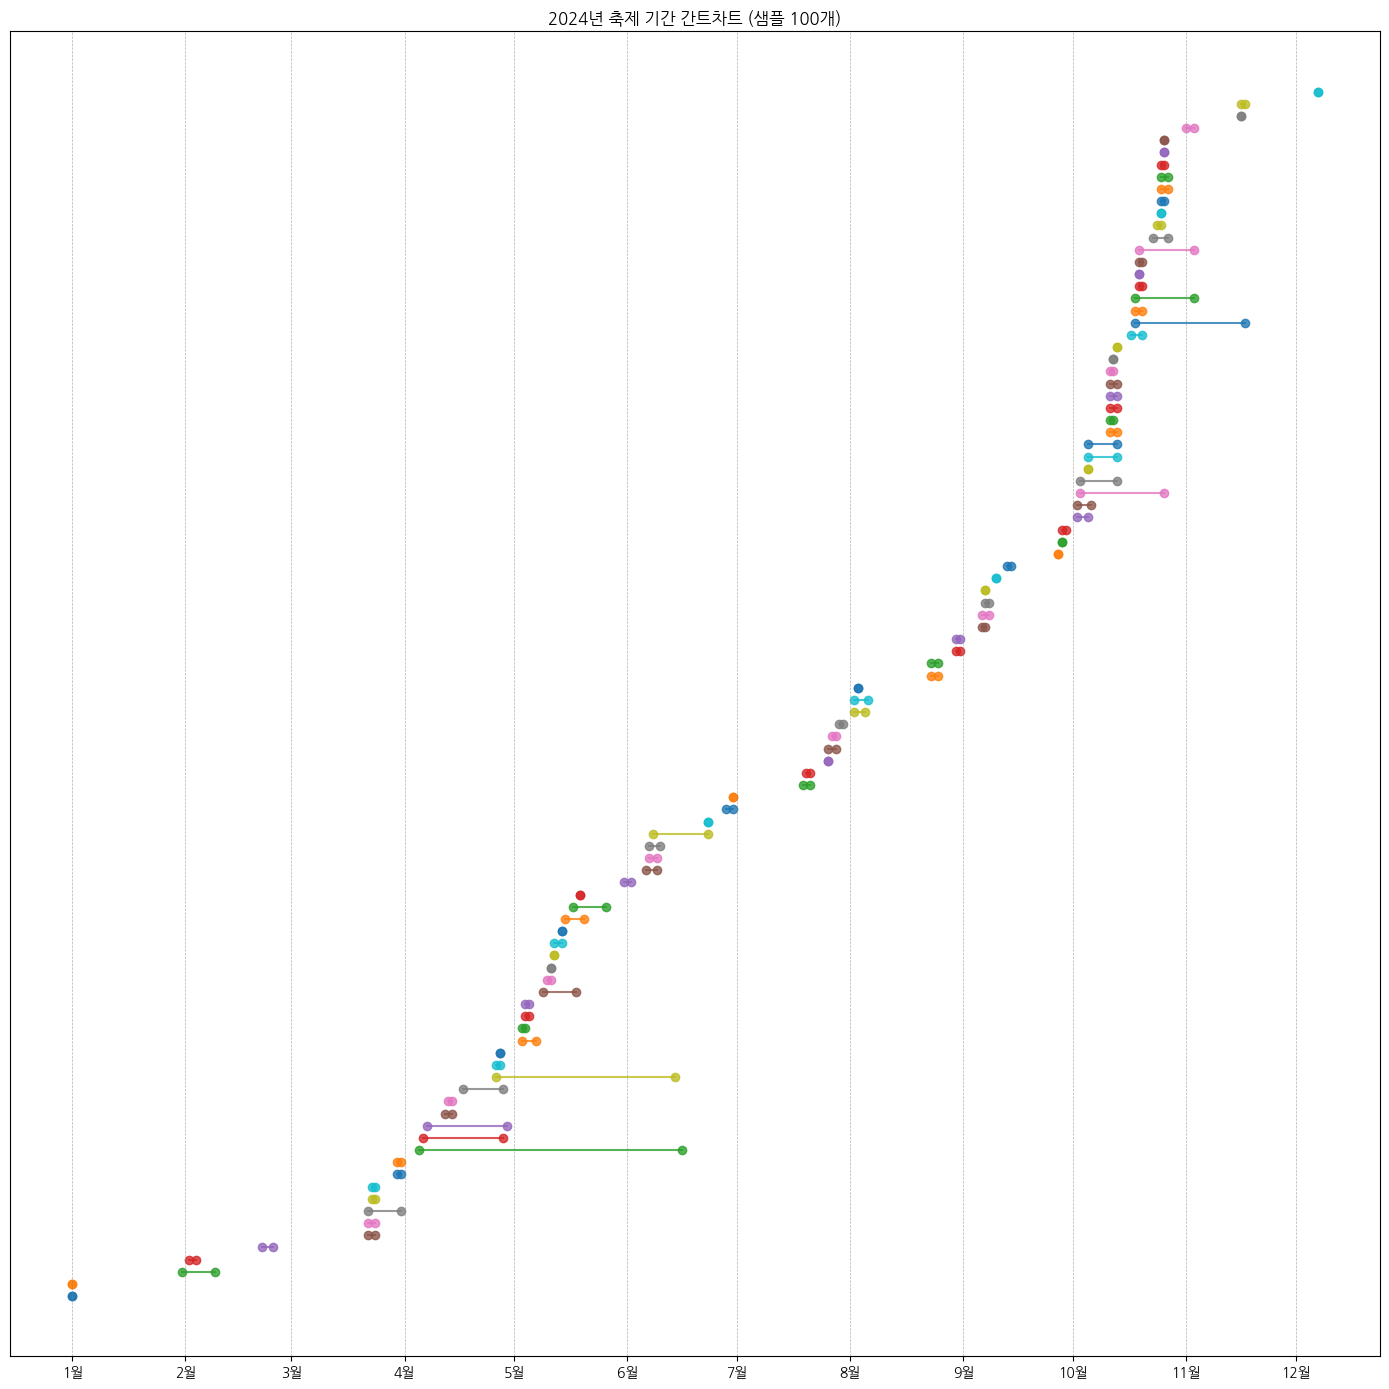

In [28]:
# 축제 시작~종료 범위 설정
start = sample['축제시작일자'].min()
end = sample['축제종료일자'].max()
months = pd.date_range(start=start, end=end, freq='MS')

# 간트차트 그리기
plt.figure(figsize=(14, 14))
for i, row in sample.iterrows():
    plt.plot([row['축제시작일자'], row['축제종료일자']], [i, i], marker='o', alpha=0.8)

plt.xticks(months, [f"{d.month:01d}월" for d in months])
plt.yticks([])
for date in months:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title('2024년 축제 기간 간트차트 (샘플 100개)')
plt.tight_layout()
plt.show()

축제의 시작일과 종료일이 선과 마커로 표시되어 있습니다.    
특히 10월에 비슷한 시기에 겹쳐 진행되는 축제들이 많네요. 

한편 4월부터 6월까지 긴 일정으로 진행되는 축제들이 몇몇 보이는데요.     
축제별로 개최 기간을 계산해보고 가장 긴 기간 동안 열리는 축제가 무엇인지 직접 확인해 봅시다.     
기간을 계산하기 위해서는 아래와 같이 `축제종료일자`에서 `축제시작일자`를 빼주면 됩니다.

In [29]:
# 개최 기간 계산
sample['기간'] = (sample['축제종료일자'] - sample['축제시작일자']).dt.days

이제 기간이 가장 긴 축제부터 정렬하여 출력해 봅시다.

In [30]:
# 개최 기간 기준으로 내림차순 정렬
sample.sort_values('기간', ascending=False, inplace=True)
sample[['축제명', '축제내용', '축제시작일자', '축제종료일자', '기간']].head(10)

,축제명,축제내용,축제시작일자,축제종료일자,기간
12,휴애리 봄 수국축제,오색빛깔 수국을 한 곳에서 올 봄 가장 많은 수국을 만나 볼 수 있는 곳,2024-04-05,2024-06-16,72
18,삼다공원 야간콘서트,도심 속 삼다공원에서 펼쳐지는 야간 문화관광 축제,2024-04-26,2024-06-14,49
80,2024 노원달빛산책,예술 등/빛 조각 작품 전시+해외작가전 등,2024-10-18,2024-11-17,30
66,전주페스타 2024,"관광거점도시 전주의 맛, 멋, 흥을 담은 10월의 전주 대표 통합축제",2024-10-03,2024-10-26,23
14,양동통맥축제,공식행사+프리마켓+문화공연+양동야시장,2024-04-07,2024-04-29,22
13,제13회 가파도 청보리 축제,청보리 밭+올레길 걷기+소망돌탑쌓기+소라낚시+보물찾기+이벤트 게임 등,2024-04-06,2024-04-28,22
82,대한민국 국향대전,함평국화의 겨울이야기,2024-10-18,2024-11-03,16
38,라벤더축제,개막식+공연행사+먹거리부스운영+라벤더사진체험등,2024-06-08,2024-06-23,15
86,유성 국화축제,국화전시+체험+공연,2024-10-19,2024-11-03,15
17,익산주얼팰리스보석대축제,"30 특별할인행사(24K, 다이아몬드 제외)+주얼리 특별전시+보석 리세팅+보석 체험...",2024-04-17,2024-04-28,11


가장 긴 기간 동안 진행되는 축제는 '휴애리 봄 수국축제'이고, 무려 72일 동안 진행되었네요!

이번에는 `event_df`에 대해서도 위와 같이 간트차트를 만들어 볼까요?

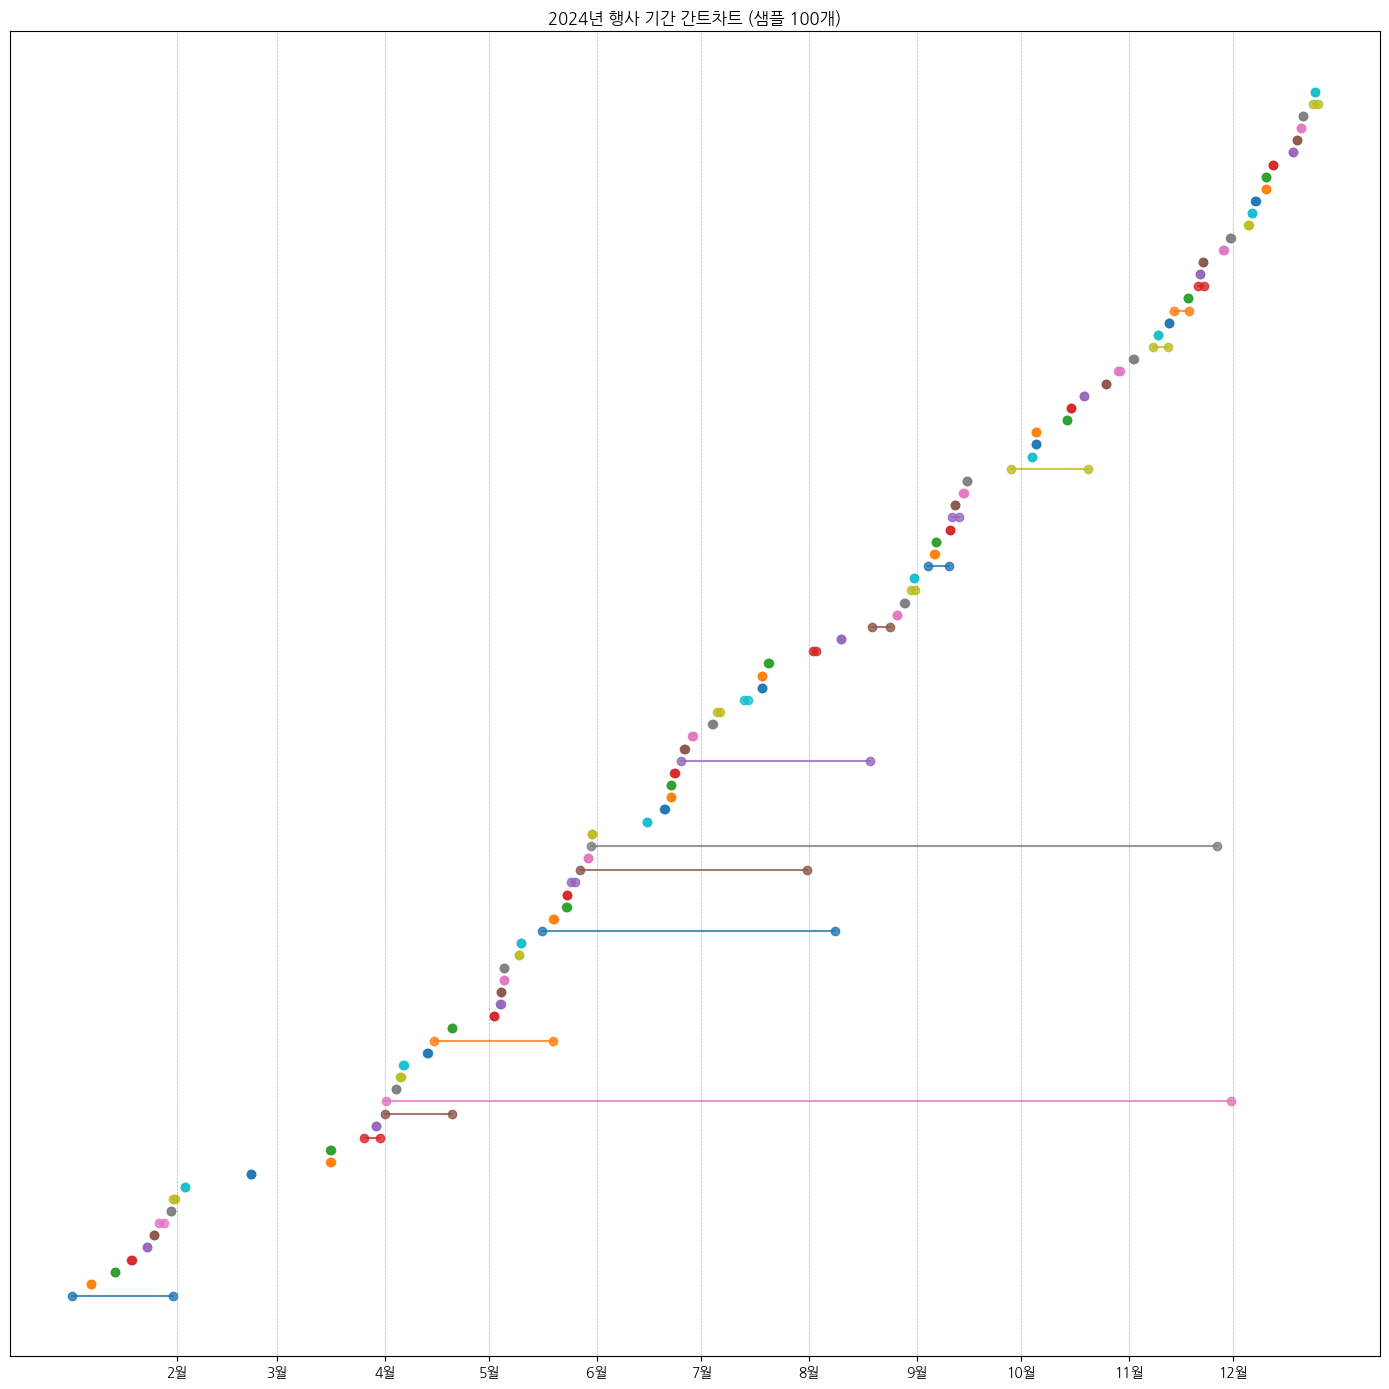

In [31]:
# 2024년에 시작하는 행사만 필터링
event_2024 = event_df[
    (event_df['행사시작일시'].dt.year == 2024)
]

sample = event_2024.sample(n=100, random_state=42).sort_values('행사시작일시').reset_index(drop=True)

# 축제 시작~종료 범위 설정
start = sample['행사시작일시'].min()
end = sample['행사종료일시'].max()
months = pd.date_range(start=start, end=end, freq='MS')

# 간트차트 그리기
plt.figure(figsize=(14, 14))
for i, row in sample.iterrows():
    plt.plot([row['행사시작일시'], row['행사종료일시']], [i, i], marker='o', alpha=0.8)

plt.xticks(months, [f"{d.month:01d}월" for d in months])
plt.yticks([])
for date in months:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

plt.title('2024년 행사 기간 간트차트 (샘플 100개)')
plt.tight_layout()
plt.show()

앞서 살펴본 축제 일정보다 더 긴 기간동안 진행되는 행사들이 많은 것을 볼 수 있습니다.  

---

### <span style="font-size:24px">[Quiz 1]</span>

❓2018년에 이루어진 행사 중 가장 긴 기간 동안 개최된 행사는 무엇일까요?

- 조건:
    - `event_df`의 `행사시작일시`가 2018년인 행만 필터링하고, 개최 기간을 계산하였을 때 기간이 가장 긴 행사의 이름(`행사명`)
    - `행사명` 값 그대로 입력 (띄어쓰기에 유의)
- 답안 형식:
    - `quiz_1` 변수에 답안을 `string` 형식으로 저장

In [32]:
# 힌트:
# 앞서 festival_df에서 2024년 축제만 필터링했던 코드를 참고합니다.
# festival_2024 = festival_df[(festival_df['축제시작일자'].dt.year == 2024)]
# 이후 개최 기간을 계산합니다.
# festival_2024['기간'] = (festival_2024['축제종료일자'] - festival_2024['축제시작일자']).dt.days
# 개최 기간 기준으로 내림차순 정렬하여, 가장 행사가 긴 행사의 행사명을 확인합니다.
# festival_2024.sort_values('기간', ascending=False, inplace=True)


In [33]:
# 답안 저장 (예: quiz_1 = "뚝딱뚝딱 정크아트")
quiz_1 = None

---

### 3.2. 지역별 행사 분포 및 규모 시각화

>🚐 "날씨도 좋으니 주말에는 좀 멀리 놀러 가볼까? 전국에서 열리는 큰 행사들을 찾아봐야지."

전국에서 개최되는 행사들을 지도 위에 시각화하여 분포와 규모를 확인해 봅니다.

`event_df`에 행사별 위도 및 경도 정보가 있으니, 이를 지도 위에 점으로 표시할 수 있겠네요.     
데이터가 많으니 3000개 샘플만 뽑아 사용하겠습니다.

>📌 `folium`은 지리 정보를 시각화할 수 있는 지도를 생성하는 라이브러리입니다.

In [ ]:
# 결측치 없는 3000개 샘플만 선택
map_df = event_df.dropna(subset=['위도', '경도']).copy()
sampled_df = map_df.sample(n=3000, random_state=42)

# 중심 좌표 계산
center_lat = sampled_df['위도'].mean()
center_lon = sampled_df['경도'].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=6.5)

# 마커 추가
for idx, row in sampled_df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.8,
        tooltip=f"{row['행사명']} | {row['장소']}"
    ).add_to(m)

m

각 행사별 위치가 지도 위에 표시되었습니다.    
마우스를 각 점 위에 올리면 해당 행사명과 장소를 확인할 수 있습니다.    

이번에는 각 행사별 위치뿐만 아니라 규모(객석 수) 정보도 함께 표현해 볼까요?     
위경도 좌표 기반으로 지도 위에 표시하되, 객석 수에 따라 원의 크기를 다르게 지정해 봅시다.

In [ ]:
# 결측치 없는 3000개 샘플만 선택
map_df = event_df.dropna(subset=['위도', '경도', '객석수']).copy()
sampled_df = map_df.sample(n=3000, random_state=42)

# 중심 좌표 계산
center_lat = sampled_df['위도'].mean()
center_lon = sampled_df['경도'].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=6.5)

# 마커 추가
for idx, row in sampled_df.iterrows():
    # 객석수에 따라 반지름 계산
    seats = row['객석수']
    radius = np.clip(np.sqrt(seats) * 0.2, 2, 15)  # 최소 2, 최대 15 픽셀

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=radius,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.2,
        tooltip=f"{row['행사명']} | {row['장소']} | 객석수: {int(seats)}"
    ).add_to(m)

m

이제 각 행사의 위치뿐만 아니라 규모까지 한 눈에 살펴볼 수 있게 되었네요!
제천의 '박달가요제', 금산의 '더 트롯쇼' 등은 약 8000개 이상의 객석이 준비된 큰 축제인 것을 확인할 수 있습니다.

한편 행사 중 가장 많은 객석 수를 보유한 개최지는 어디일까요?     
`event_df`에서 `객석수` 컬럼을 기준으로 내림차순 정렬하여 확인해 봅시다.

In [ ]:
# 객석 수 기준 내림차순 정렬
top5_seats = event_df.dropna(subset=['객석수']).sort_values(by='객석수', ascending=False).head()
top5_seats[['행사명', '장소', '소재지도로명주소', '객석수']]

객석 수가 가장 많이 준비된 장소는 서울의 월드컵경기장이고, 총 66,704개의 객석이 마련되어 있네요.

---

### 3.3. 입장 연령 분포 분석

>👧 "아이들을 데리고 갈만한 주변 행사들에는 어떤 것들이 있을까?"

입장 연령의 분류에 따라 행사들을 나누어 봅시다.

앞서 2. 데이터 정제하기에서 통일되지 않은 입장 연령 텍스트를 분류하여 `연령분류` 컬럼에 저장했던 과정을 기억하시나요?     
다시 한번 분류 조건과 결과를 확인해 봅시다.

**분류 조건 (텍스트 포함 여부)**:
- `영유아`: 개월, 1-6세, 유아
- `아동`: 7-12세, 초등, 초중, 취학, 아동
- `청소년`: 13-18세, 중학, 중등, 중고, 고등, 청소년
- `성인`: 19-60세, 성인 등 
- `전체`: 전체, 모든 등

In [ ]:
# 입장 연령 관련 컬럼 확인
event_df[['입장연령', '연령분류']]

이제 각 연령 분류별로 그룹화하여 그룹별 행사의 개수를 계산해 볼까요?

In [ ]:
# 연령 분류별 행사 수 계산
grouped = event_df.groupby('연령분류').size().sort_values(ascending=False)
grouped

'아동' 이상 관람 가능한 행사가 가장 많은 것을 알 수 있습니다.    
한편 '성인' 이상만을 대상으로 하는 행사는 굉장히 적네요!

그럼 각 분류별로 어떤 행사들이 있는지 가볍게 살펴볼까요?

In [ ]:
# 영유아 대상 행사
event_df.loc[event_df['연령분류'] == '영유아', ['행사명', '행사내용', '연령분류']]

'영유아'를 대상으로 한 행사는 연극, 뮤지컬 등이 있네요.

In [ ]:
# 아동 대상 행사
event_df.loc[event_df['연령분류'] == '아동', ['행사명', '행사내용', '연령분류']]

'아동' 이상 관람 가능한 행사로는 다양한 공연 등이 있습니다.

In [ ]:
# 청소년 대상 행사
event_df.loc[event_df['연령분류'] == '청소년', ['행사명', '행사내용', '연령분류']]

'청소년' 대상 행사도 연극 등이 많네요.

In [ ]:
# 성인 대상 행사
event_df.loc[event_df['연령분류'] == '성인', ['행사명', '행사내용', '연령분류']]

'성인' 대상 행사로는 직장인들이나 교직원을 위한 전문 강좌들이 있습니다.

In [ ]:
# 전체 관람 가능 행사
event_df.loc[event_df['연령분류'] == '전체', ['행사명', '행사내용', '연령분류']]

마지막으로 '전체' 관람 가능 행사로는 온 가족이 함께 할 수 있는 콘서트, 박물관 전시회 등이 있네요.

---

### 3.4. 행사 내용 키워드 분석

>🖍️ "올해 열린 전국 행사들에서 가장 많이 등장하는 키워드는 무엇일까?"

행사 내용 텍스트를 바탕으로 토큰화, n-gram, 워드클라우드 등을 통해 키워드를 분석해 봅니다.

텍스트에서 키워드를 분석하기 위해서는 '토큰화'라는 과정이 필요합니다.     
토큰화는 문장을 공백, 구두점, 형태소 등의 기준으로 나누어 텍스트를 분석 가능한 최소 단위의 토큰으로 분리하는 전처리 과정입니다.    
예) 명사 추출: "학생은 도서관에서 책을 읽었다." → "학생", "도서관", "책"

먼저 토큰화를 위해 `event_df`의 `행사내용`컬럼 값들을 전부 하나의 리스트 안에 담아 봅시다.

In [ ]:
# 행사 내용 텍스트 리스트화
corpus = event_df['행사내용'].dropna().tolist()

# 중복 제거
corpus = list(set(corpus))

# 상위 10개 텍스트 확인
corpus[:10]

이제 토큰화를 진행할 '토크나이저'를 불러와야 합니다.    
토크나이저는 텍스트를 정해진 규칙이나 알고리즘에 따라 토큰 단위로 분리해주는 도구입니다.    
이번 분석에서는 한국어 토크나이저 중 하나인 `Okt`를 사용하겠습니다.

>📌 `Okt`는 한국어 텍스트를 형태소 단위로 분석하고, 품사 태깅 및 토큰화를 지원하는 형태소 분석기입니다.

`Okt`를 통해 전체 텍스트에서 명사만 추출해 볼까요?

In [ ]:
# Okt 객체 생성
okt = Okt()

# 명사 추출 (토큰화)
tokenized_docs = [okt.nouns(doc) for doc in corpus]

# 불필요한 짧은 단어 (한 글자) 제거
tokens = [token for doc in tokenized_docs for token in doc if len(token) > 1]

이제 행사 내용에서 가장 많이 등장한 명사 10개를 확인해 봅시다.

In [ ]:
# 단어 빈도수 계산
word_counts = Counter(tokens)

print("[상위 10개 단어]")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

'공연', '클래식', '뮤지컬' 등 공연과 관련한 단어가 가장 많이 등장한 것을 볼 수 있습니다.

다음으로 하나의 단어가 아닌 '연속된 여러 단어 묶음'을 분석하기 위해 텍스트를 N-gram으로 나타내 볼까요?

>📌 `N-gram`은 텍스트에서 연속된 N개의 단어 단위를 추출하여 문맥이나 표현 패턴을 파악할 수 있도록 돕는 기법입니다.

먼저 두 개의 연속된 단어를 묶는 bigram을 통해 텍스트를 분석해 보겠습니다.     

>📌 `CountVectorizer`는 텍스트 데이터를 단어의 등장 빈도 기준으로 벡터화하여 머신러닝 모델이 처리할 수 있는 수치 형태로 변환해주는 도구입니다. 주로 단어의 출현 횟수를 기반으로 문서의 특징을 추출할 때 사용됩니다.


In [ ]:
# 토크나이저 정의
def okt_tokenizer(text):
    return [word for word in okt.nouns(text) if len(word) > 1]

# bigram 분석
# ngram_range=(a, b) : a개부터 b개까지 연속된 단어 조합
vectorizer = CountVectorizer(tokenizer=okt_tokenizer, ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)

# 빈도 계산 및 정렬
ngram_freq = sorted(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)

# 상위 20개 bigram 출력
print("[상위 20개 bigram]")
for ngram, freq in ngram_freq[:20]:
    print(f"{ngram}: {freq}")

'OO 공연'과 같은 bigram이 많이 등장한 것을 확인할 수 있네요.     
이번에는 연속된 3개의 단어를 묶는 trigram을 분석해 보겠습니다.

In [ ]:
# trigram 분석
# ngram_range=(a, b) : a개부터 b개까지 연속된 단어 조합
vectorizer = CountVectorizer(tokenizer=okt_tokenizer, ngram_range=(3, 3))
X = vectorizer.fit_transform(corpus)

# 빈도 계산 및 정렬
ngram_freq = sorted(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)

# 상위 20개 trigram 출력
print("[상위 20개 trigram]")
for ngram, freq in ngram_freq[:20]:
    print(f"{ngram}: {freq}")

bigram보다는 조금 더 다양한 단어의 조합이 나타난 것을 볼 수 있습니다.

다음으로 키워드의 등장 빈도를 워드클라우드로 시각화해 볼까요?

>📌 `WordCloud`는 텍스트 데이터에서 단어의 중요도나 빈도를 시각적으로 표현하는 그래픽 도구로, 자주 등장하는 단어일수록 크고 굵게 표시되어 직관적으로 핵심 키워드를 파악할 수 있게 도와줍니다.

공연 행사 데이터의 행사 내용 텍스트를 워드클라우드로 만들어 봅시다.

In [ ]:
# 워드클라우드 시각화
wordcloud = WordCloud(font_path='data/NanumGothicCoding-Bold.ttf', width=800, height=600, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

'공연', '콘서트', '뮤지컬'과 같은 키워드가 강조되었네요.    

마지막으로 문화 축제 데이터의 축제 내용 텍스트도 워드클라우드로 만들어 봅시다.

In [ ]:
# 축제 데이터 내용 텍스트 리스트화
corpus = festival_df['축제내용'].dropna().tolist()
corpus = list(set(corpus))

# 명사 추출 (토큰화)
tokenized_docs = [okt.nouns(doc) for doc in corpus]
tokens = [token for doc in tokenized_docs for token in doc if len(token) > 1]

# 단어 빈도수 계산
word_counts = Counter(tokens)

wordcloud = WordCloud(font_path='data/NanumGothicCoding-Bold.ttf', width=800, height=600, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

문화 축제 데이터에서는 '체험', '전시', '행사' 등의 키워드가 강조된 것을 확인할 수 있습니다.

---

### 3.5. 관람 요금 분석

>🎟️ "아동 대상 행사의 관람 요금은 성인 대상 행사보다 저렴할까?"

공연 행사 데이터의 요금 정보 및 연령 분류벌 관람 요금을 분석해 봅니다.

먼저 `event_df`의 `요금정보` 열을 확인해 볼까요?

In [ ]:
# 요금 정보 컬럼 고유값 확인
event_df['요금정보'].value_counts()

각 행사별로 무료/유료/혼합과 같이 요금 정보 라벨이 표시되어 있습니다.

이번에는 `관람요금` 컬럼을 확인해 봅시다.

In [ ]:
# 관람 요금 상위 5개 행 확인
event_df['관람요금'].head()

각 행사별 관람 요금(단위: 원)이 표시되어 있네요.    
결측치는 해당 행사가 무료인 경우나 데이터를 정제할 때 이상치로 분류된 경우입니다.

관람 요금이 가장 비싼 행사는 무엇일까요?     
`관람요금` 열을 기준으로 내림차순 정렬하여 확인해 봅시다.

In [ ]:
# 관람 요금이 0보다 큰 행만 필터링
filtered_df = event_df[event_df['관람요금'] > 0]

# 관람 요금 기준 내림차순 정렬
top5 = filtered_df.sort_values(by='관람요금', ascending=False).head()
top5[['행사명', '행사내용', '관람요금']]

관람 요금이 비싼 상위 5개의 행사를 살펴보면 전부 '콘서트'에 해당하는 것을 알 수 있습니다.

다음으로 연령 분류 그룹에 따라 관람 요금의 평균이 얼마인지 확인해 볼까요?     
관람 요금이 무료가 아닌 데이터 중에서 `연령분류` 열을 기준으로 그룹화하여 `관람요금` 컬럼의 평균을 계산해 봅시다.

In [ ]:
# 연령 분류 기준으로 그룹화하여 관람 요금 평균 계산
grouped = filtered_df.groupby('연령분류')['관람요금'].mean().sort_values(ascending=False)
grouped

직관적인 비교를 위해 위 정보를 시각화하여 분석해 봅시다.

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped.index.tolist(), grouped.values, color='skyblue')
plt.title('연령 분류별 평균 관람요금', fontsize=14)
plt.xlabel('연령 분류', fontsize=12)
plt.ylabel('평균 관람요금 (원)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(grouped.values):
    plt.text(i, v + 1000, f'{int(v):,}원', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

성인을 대상으로 한 행사의 평균 관람 요금이 가장 높았고, 기타와 전체를 제외하면 청소년 대상 행사의 평균 관람 요금이 가장 낮았네요.

마지막으로 행사 시간과 관람 요금 사이의 상관관계를 분석해 봅시다.    
행사 시간이 길수록, 즉 3시간 분량의 행사보다 6시간 분량의 행사가 관람 요금이 비쌀까요?    
행사 시간은 `행사종료일시` - `행사시작일시`로 계산하고, 24시간을 초과하는 데이터는 제외하겠습니다.    
예) 11:00 ~ 17:00 = 6시간

In [ ]:
# 행사 시간 계산
filtered_df['시간'] = ((filtered_df['행사종료일시'] - filtered_df['행사시작일시']).dt.total_seconds() / 3600).astype(float)
filtered_df = filtered_df[(filtered_df['시간'] > 0) & (filtered_df['시간'] < 24)]
filtered_df[['행사시작일시', '행사종료일시', '시간']]

이제 행사 시간과 관람 요금 사이의 상관관계를 살펴볼까요?

In [ ]:
# 행사 시간과 관람 요금의 상관관계 분석
filtered_df[['시간', '관람요금']].corr()

상관계수가 거의 0에 가깝고, 음의 상관관계를 보이고 있네요.    
즉 행사 시간과 관람 요금은 선형적인 관계가 거의 없다고 봐도 될 것 같습니다.

산점도를 통해 분포를 시각화해 봅시다.

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['시간'], filtered_df['관람요금'], alpha=0.6)
plt.title('행사 시간 vs 관람 요금 산점도')
plt.xlabel('시간 (시)')
plt.ylabel('관람 요금 (원)')
plt.grid(True)
plt.show()

상관계수에서 확인했던 것처럼, 행사 시간과 관람 요금 사이에는 선형적인 상관관계가 보이지 않습니다.    
하루 종일 진행되는 행사가 아주 저렴한 경우도 있고, 2시간 정도 진행되는 행사가 아주 비싼 경우도 있네요.

---

### <span style="font-size:24px">[Quiz 2]</span>

❓행사 데이터에서 연령 분류가 '영유아'인 행사 중 요금 정보가 '무료'인 행사는 몇 개일까요?

- 조건:
    - `event_df`를 `연령분류`, `요금정보` 열을 기준으로 그룹화하여 개수 계산
    - `연령분류`가 '영유아'이고 `요금정보`가 '무료'인 경우의 개수 (주의: `관람요금` 기준이 아님!)
- 답안 형식:
    - `quiz_2` 변수에 답안을 `int` 형식으로 저장

In [ ]:
# 힌트:
# 앞서 연령 분류별로 그룹화하여 개수를 셌던 코드를 참고합니다. ['연령분류', '요금정보']와 같이 여러개의 컬럼을 그룹화할 수 있습니다.
# grouped = event_df.groupby('연령분류').size()
# 연령 분류가 '영유아'이고 요금 정보가 '무료'인 경우의 개수를 세어봅니다. 이때 '관람요금'이 아니라 '요금정보'열을 확인해야 합니다!


In [ ]:
# 답안 저장 (예: quiz_2 = 100)
quiz_2 = None

---

## 4. 퀴즈 제출하기

`3. 데이터 분석하기` 섹션에서 [Quiz] 2개를 모두 완료한 후, 아래 코드를 실행하여 정답을 저장할 수 있습니다.   
저장 후 오른쪽 상단의 '제출' 버튼을 클릭해 주세요.

🟨 **주의 사항**
- 아래 코드를 실행하기 전 `quiz_1`, `quiz_2` 변수가 제대로 저장되었는지, 지정된 타입이 맞는지 반드시 확인해 주세요.
- 아래 코드를 임의로 수정할 경우 채점이 제대로 이루어지지 않을 수 있습니다.

In [ ]:
import json

student_answers = {}
student_answers["quiz_1"] = str(quiz_1)
student_answers["quiz_2"] = int(quiz_2)

with open("result.json", "w") as f:
    json.dump(student_answers, f)